<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

building a deep learning model to predict the churn and use precision,recall and f1-score to measure performance of our model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Load the data**

In [23]:
df = pd.read_csv("/content/Untitled spreadsheet - E Comm.csv")
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5283,55284,0,9.0,Mobile Phone,1,17.0,Credit Card,Female,3.0,4,Laptop & Accessory,3,Single,5,1,17.0,1.0,2.0,5.0,186
5242,55243,0,1.0,Phone,1,27.0,Debit Card,Male,4.0,4,Laptop & Accessory,3,Single,2,0,15.0,2.0,2.0,3.0,148
4749,54750,1,1.0,Phone,1,7.0,Debit Card,Female,3.0,5,Mobile Phone,5,Married,3,1,12.0,1.0,2.0,1.0,148
5411,55412,0,4.0,Mobile Phone,3,22.0,E wallet,Male,4.0,5,Fashion,5,Married,4,0,12.0,2.0,2.0,8.0,196
877,50878,0,8.0,Computer,1,24.0,Debit Card,Male,2.0,3,Fashion,2,Single,3,0,11.0,0.0,2.0,2.0,194


**First of all, drop customerID column as it is of no use**

In [24]:
df.drop('CustomerID',axis='columns',inplace=True)

In [25]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

**Quick glance at above makes me realize that CashbackAmount should be float but it is an object. Let's check what's going on with  this column**

In [26]:
df.CashbackAmount.values

array([160, 121, 120, ..., 186, 179, 169])

**Ahh... it is string. Lets convert it to numbers**

In [27]:
pd.to_numeric(df.CashbackAmount)

0       160
1       121
2       120
3       134
4       130
       ... 
5625    151
5626    225
5627    186
5628    179
5629    169
Name: CashbackAmount, Length: 5630, dtype: int64

**Hmmm... some values seems to be not numbers but blank string. Let's find out such rows**

In [13]:
pd.to_numeric(df.CashbackAmount,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5625    False
5626    False
5627    False
5628    False
5629    False
Name: CashbackAmount, Length: 5630, dtype: bool

In [14]:
df[pd.to_numeric(df.CashbackAmount,errors='coerce').isnull()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


In [28]:
df.shape

(5630, 19)

In [29]:
df.iloc[488].CashbackAmount

137

In [17]:
df[df.CashbackAmount!=' '].shape

(5630, 19)

**Remove rows with space in CashbackAmount**

In [18]:
df1 = df[df.CashbackAmount!=' ']
df1.shape

(5630, 19)

In [19]:
df1.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [30]:
df1.CashbackAmount = pd.to_numeric(df1.CashbackAmount)

AttributeError: module 'pandas' has no attribute 'to_float'

In [31]:
df1.CashbackAmount.values

array([160, 121, 120, ..., 186, 179, 169])

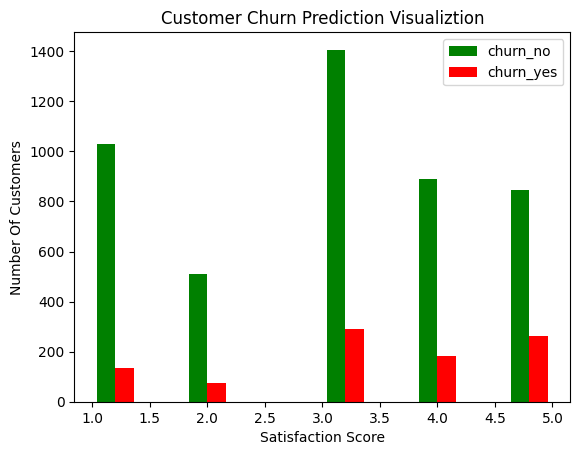

In [40]:
tenure_churn_no = df1[df1.Churn==0].SatisfactionScore
tenure_churn_yes = df1[df1.Churn==1].SatisfactionScore
plt.hist([tenure_churn_no, tenure_churn_yes],color=['green','red'], label=['churn_no','churn_yes'])
plt.xlabel('Satisfaction Score')
plt.ylabel('Number Of Customers')
plt.title('Customer Churn Prediction Visualiztion')
plt.legend()

**Data Visualization**

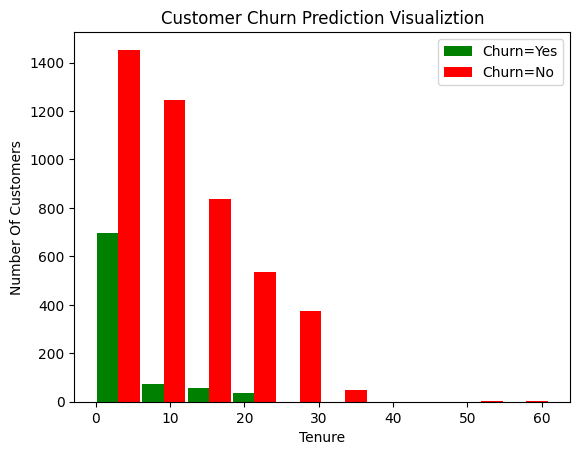

In [41]:
tenure_churn_no = df1[df1.Churn==0].Tenure
tenure_churn_yes = df1[df1.Churn==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

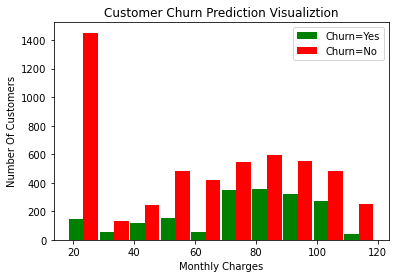

In [ ]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [45]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [46]:
print_unique_col_values(df1)

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']
PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


**Some of the columns have repeating values, that can be replaced with a simple No**

In [48]:
df1.replace('Divorced','Single',inplace=True)
df1.replace('Mobile Phone','Mobile',inplace=True)

In [49]:
print_unique_col_values(df1)

PreferredLoginDevice: ['Mobile' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Married']


In [50]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

Churn: [1 0]
Tenure: [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
PreferredLoginDevice: ['Mobile' 'Phone' 'Computer']
CityTier: [3 1 2]
WarehouseToHome: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
HourSpendOnApp: [ 3.  2. nan  1.  0.  4.  5.]
NumberOfDeviceRegistered: [3 4 5 2 1 6]
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Others' 'Fashion' 'Grocery']
SatisfactionScore: [2 3 5 4 1]
MaritalStatus: ['Single' 'Married']
NumberOfAddress: [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
Complain: [1 0]
OrderAmountHikeFromlastYear: [11. 15. 14. 23. 22. 16. 12. nan 13. 17. 18. 24. 19. 20. 21. 25. 26.]
CouponUsed: [ 1.  0.  4.  

In [51]:
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [58]:
df1.Gender.unique()

array([1, 0])

**One hot encoding for categorical columns**

In [54]:
df2 = pd.get_dummies(data=df1, columns=['PreferredLoginDevice','PreferedOrderCat','PreferredPaymentMode'])
df2.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile', 'PreferredLoginDevice_Phone',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others', 'PreferredPaymentMode_CC',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI'],
      dtype='object')

In [55]:
df2.sample(5)

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,...,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI
440,0,0.0,1,16.0,0,3.0,2,3,Single,2,...,False,True,False,False,False,False,True,False,False,False
1802,1,NaN,3,11.0,0,3.0,3,4,Single,2,...,False,True,False,False,False,False,False,False,True,False
2579,0,20.0,3,8.0,0,2.0,3,4,Married,8,...,True,False,False,False,False,False,False,False,True,False
3672,0,12.0,1,14.0,0,3.0,2,3,Married,3,...,False,True,False,False,False,False,False,True,False,False
3148,0,14.0,3,35.0,0,3.0,6,5,Married,5,...,False,False,False,False,False,False,False,False,False,True


In [63]:
df2['MaritalStatus'].replace({'Married':1,'Single':0},inplace=True)

In [66]:
df2.sample(5)

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,...,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI
698,0,2.0,1,16.0,1,3.0,3,4,1,1,...,False,True,False,False,False,False,False,True,False,False
3160,0,1.0,3,31.0,0,3.0,4,2,0,2,...,False,True,False,False,False,False,True,False,False,False
1943,1,0.0,1,8.0,0,2.0,3,3,0,7,...,False,True,False,False,False,False,True,False,False,False
3834,0,5.0,3,9.0,0,3.0,4,5,0,9,...,True,False,False,False,False,False,False,False,False,True
2973,0,29.0,1,27.0,0,3.0,4,2,0,5,...,True,False,False,False,True,False,False,False,False,False


In [67]:
df2.dtypes

Churn                                      int64
Tenure                                   float64
CityTier                                   int64
WarehouseToHome                          float64
Gender                                     int64
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
SatisfactionScore                          int64
MaritalStatus                              int64
NumberOfAddress                            int64
Complain                                   int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                             int64
PreferredLoginDevice_Computer               bool
PreferredLoginDevice_Mobile                 bool
PreferredLoginDevice_Phone                  bool
PreferedOrderCat_Fashion                    bool
PreferedOrderCat_Gro

Change the bool values to int.

In [76]:
# Iterate over all columns in the DataFrame
for col in df2.columns:
    # Check if the column has boolean data type
    if df2[col].dtype == bool:
        # Convert boolean values to integers (True -> 1, False -> 0)
        df2[col] = df2[col].astype(int)

In [77]:
df2.dtypes


Churn                                      int64
Tenure                                   float64
CityTier                                   int64
WarehouseToHome                          float64
Gender                                     int64
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
SatisfactionScore                          int64
MaritalStatus                              int64
NumberOfAddress                            int64
Complain                                   int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                             int64
PreferredLoginDevice_Computer              int64
PreferredLoginDevice_Mobile                int64
PreferredLoginDevice_Phone                 int64
PreferedOrderCat_Fashion                   int64
PreferedOrderCat_Gro

scaling the columns between 0 to 1 for better model using sklearn.preprocessing

In [81]:
cols_to_scale = ['Tenure', 'CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [82]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

Churn: [1 0]
Tenure: [0.06557377        nan 0.         0.21311475 0.18032787 0.14754098
 0.31147541 0.32786885 0.2295082  0.13114754 0.29508197 0.08196721
 0.03278689 0.49180328 0.01639344 0.37704918 0.04918033 0.47540984
 0.09836066 0.42622951 0.45901639 0.1147541  0.39344262 0.40983607
 0.16393443 0.24590164 0.36065574 0.44262295 0.26229508 0.19672131
 0.3442623  0.27868852 0.81967213 0.98360656 0.50819672 0.83606557
 1.        ]
CityTier: [1.  0.  0.5]
WarehouseToHome: [0.00819672 0.02459016 0.20491803 0.08196721 0.05737705 0.13934426
 0.04918033 0.03278689 0.21311475 0.10655738 0.06557377 0.12295082
 0.19672131 0.18852459 0.17213115 0.07377049        nan 0.04098361
 0.18032787 0.09836066 0.14754098 0.2295082  0.1147541  0.24590164
 0.1557377  0.09016393 0.16393443 0.22131148 0.23770492 0.
 0.13114754 0.99180328 0.01639344 0.25409836 1.        ]
Gender: [1 0]
HourSpendOnApp: [0.6 0.4 nan 0.2 0.  0.8 1. ]
NumberOfDeviceRegistered: [0.4 0.6 0.8 0.2 0.  1. ]
SatisfactionScore: [0.25 0.

dropping nan values in df2 columns

In [83]:
df2 = df2.dropna()

In [84]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

Churn: [1 0]
Tenure: [0.06557377 0.         0.18032787 0.14754098 0.31147541 0.32786885
 0.2295082  0.13114754 0.08196721 0.03278689 0.49180328 0.21311475
 0.04918033 0.29508197 0.47540984 0.37704918 0.42622951 0.1147541
 0.16393443 0.24590164 0.36065574 0.01639344 0.44262295 0.40983607
 0.45901639 0.39344262 0.19672131 0.09836066 0.26229508 0.3442623
 0.27868852 0.81967213 0.50819672 0.83606557]
CityTier: [1.  0.  0.5]
WarehouseToHome: [0.00819672 0.08196721 0.13934426 0.04918033 0.06557377 0.12295082
 0.05737705 0.19672131 0.17213115 0.07377049 0.04098361 0.20491803
 0.02459016 0.10655738 0.1147541  0.18032787 0.24590164 0.1557377
 0.09016393 0.2295082  0.22131148 0.03278689 0.14754098 0.09836066
 0.23770492 0.21311475 0.18852459 0.16393443 0.13114754 0.
 0.99180328 0.01639344 0.25409836 1.        ]
Gender: [1 0]
HourSpendOnApp: [0.6 0.4 0.2 0.8 0.  1. ]
NumberOfDeviceRegistered: [0.4 0.6 0.8 0.2 0.  1. ]
SatisfactionScore: [0.25 1.   0.5  0.75 0.  ]
MaritalStatus: [0 1]
NumberOfAddr

**Train test split**

In [85]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [86]:
X_train.shape

(3019, 30)

In [87]:
X_test.shape

(755, 30)

In [88]:
X_train[:10]

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,...,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI
4689,0.196721,0.0,0.016393,1,0.6,0.2,0.00,0,0.047619,0,...,1,0,0,0,0,0,0,1,0,0
5386,0.098361,0.0,0.098361,0,0.6,0.6,0.50,1,0.333333,0,...,0,1,0,0,0,0,0,1,0,0
3485,0.180328,1.0,0.098361,1,0.6,0.8,0.25,1,0.142857,1,...,1,0,0,0,0,0,0,1,0,0
3262,0.049180,0.0,0.237705,1,0.8,0.6,0.50,0,0.238095,0,...,1,0,0,0,0,0,1,0,0,0
2922,0.508197,0.5,0.065574,0,0.6,0.6,0.50,0,0.428571,0,...,0,1,0,0,0,0,1,0,0,0
4864,0.147541,1.0,0.040984,0,0.8,0.6,0.00,1,0.333333,0,...,0,0,0,0,0,0,0,1,0,0
3092,0.065574,1.0,0.114754,1,0.6,0.6,0.50,0,0.047619,0,...,1,0,0,0,1,0,0,0,0,0
5257,0.016393,0.0,0.188525,0,0.6,0.8,1.00,1,0.047619,0,...,0,1,0,0,1,0,0,0,0,0
2372,0.114754,0.0,0.016393,1,0.4,0.6,0.75,1,0.238095,0,...,0,1,0,0,0,0,0,1,0,0
3041,0.098361,0.0,0.032787,1,0.8,0.6,0.75,0,0.095238,0,...,0,1,0,0,0,0,1,0,0,0


In [89]:
len(X_train.columns)

30

**Build a model (ANN) in tensorflow/keras**

In [95]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(25, input_shape=(30,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
95/95 [==============================] - 2s 4ms/step - loss: 0.4698 - accuracy: 0.8344
Epoch 2/100
95/95 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.8344
Epoch 3/100
95/95 [==============================] - 0s 5ms/step - loss: 0.3506 - accuracy: 0.8486
Epoch 4/100
95/95 [==============================] - 1s 6ms/step - loss: 0.3325 - accuracy: 0.8652
Epoch 5/100
95/95 [==============================] - 0s 5ms/step - loss: 0.3117 - accuracy: 0.8738
Epoch 6/100
95/95 [==============================] - 0s 5ms/step - loss: 0.2951 - accuracy: 0.8791
Epoch 7/100
95/95 [==============================] - 1s 5ms/step - loss: 0.2827 - accuracy: 0.8867
Epoch 8/100
95/95 [==============================] - 0s 4ms/step - loss: 0.2722 - accuracy: 0.8933
Epoch 9/100
95/95 [==============================] - 1s 6ms/step - loss: 0.2622 - accuracy: 0.9013
Epoch 10/100
95/95 [==============================] - 1s 7ms/step - loss: 0.2566 - accuracy: 0.8990
Epoch 11/

In [96]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9311


[0.21142444014549255, 0.931125819683075]

In [97]:
yp = model.predict(X_test)
yp[:5]

24/24 [==============================] - 0s 2ms/step


array([[4.7883233e-05],
       [1.6447474e-01],
       [2.7116343e-02],
       [1.8218383e-01],
       [1.2489178e-10]], dtype=float32)

In [98]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [99]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [100]:
y_test[:10]

4586    0
3999    0
3062    0
4639    1
2313    0
1665    0
1162    0
3650    0
3219    0
5095    0
Name: Churn, dtype: int64

In [101]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       624
           1       0.83      0.76      0.79       131

    accuracy                           0.93       755
   macro avg       0.89      0.86      0.88       755
weighted avg       0.93      0.93      0.93       755



Text(95.72222222222221, 0.5, 'Truth')

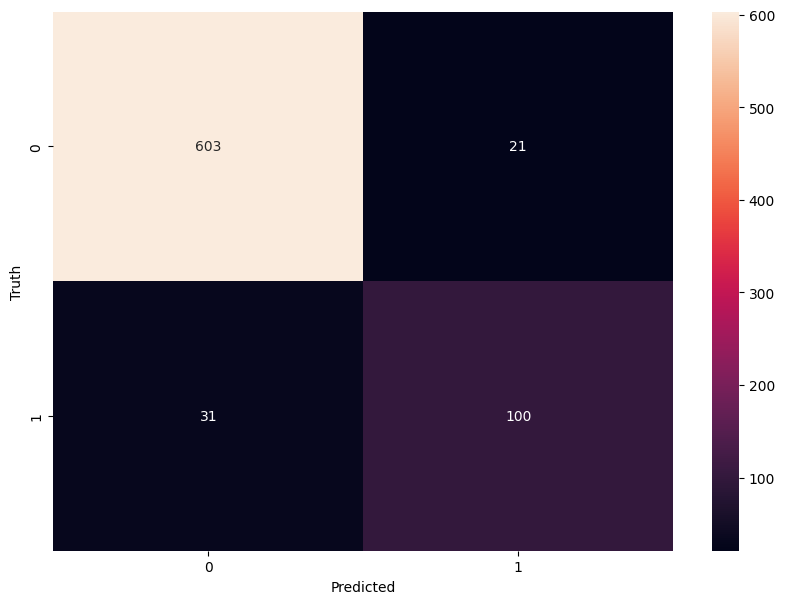

In [102]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [103]:
y_test.shape

(755,)

**Accuracy**

In [104]:
round((603+100)/(603+100+31+21),2)

0.93

**Precision for 0 class. i.e. Precision for customers who did not churn**

In [106]:
round(603/(603+31),2)

0.95

**Precision for 1 class. i.e. Precision for customers who actually churned**

In [107]:
round(100/(100+21),2)

0.83

**Recall for 0 class**

In [108]:
round(603/(603+21),2)

0.97

In [109]:
round(100/(100+31),2)

0.76